# Spotify Training Model on Dataset of 90s
### Loading necessary libraries

In [72]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf


In [73]:
df = pd.read_csv("dataset-of-90s.csv")
df.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430653,4,25.57331,20,0
5,Cuspa Cerveja...,Os Pedrero,spotify:track:6IYGvJanVieBEtJaO4IGfc,0.166,0.985,2,-4.529,1,0.1190,0.147000,0.179000,0.5400,0.609,170.045,65667,4,28.13311,4,0
6,Baby-Baby-Baby,TLC,spotify:track:1zTuB57LYZa7xu7KUH8kF0,0.679,0.597,11,-8.601,0,0.0439,0.091300,0.000673,0.0487,0.900,184.174,315040,4,20.93007,15,1
7,I Missed The Bus,Kris Kross,spotify:track:793gh4IXh7mQsMBhvcJRlt,0.811,0.634,4,-10.408,0,0.0714,0.004690,0.009430,0.2240,0.273,107.915,179160,4,54.78730,9,1
8,The Comfort Zone,Vanessa Williams,spotify:track:7okbmgA8lRBGl5limZ7LFM,0.528,0.234,3,-15.784,1,0.0283,0.641000,0.000000,0.1830,0.191,95.911,218733,4,46.33298,10,1
9,Hardcore Rules,25 Ta Life,spotify:track:75UjNrkncJ1idxVzlxkxLW,0.207,0.989,6,-5.564,1,0.2180,0.000118,0.134000,0.2000,0.323,200.465,80987,4,49.52643,3,0


In [74]:
df.shape

(5520, 19)

## Shuffling data

In [75]:
df = df.sample(frac=1)

## Dropping categorical features

In [76]:
X = df.drop(["track","artist","uri","target"],axis=1)
X.shape

(5520, 15)

In [77]:
y = df["target"]

## Calculating the number of hit flop songs

In [78]:
hit_flop_count = y.value_counts()
hit_flop_count

1    2760
0    2760
Name: target, dtype: int64

In [79]:
y = y.values

## Scaling inputs

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Splitting the data into train test and validation set 

In [81]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(scaled_X,y,test_size=0.1 ,random_state=1)

In [82]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [83]:
x_train.shape, x_test.shape, x_val.shape

((4416, 15), (552, 15), (552, 15))

## The Deep learning algorithm 

In [84]:
nn = 200 #hiden layers
target_count = 2

In [85]:
model_90 = tf.keras.Sequential()
model_90.add(tf.keras.layers.Flatten())

model_90.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_90.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_90.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [86]:
model_90.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [87]:
model_90.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training model

In [88]:
model_fit = model_90.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.7998 - val_loss: 0.3814 - val_accuracy: 0.8261
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8419 - val_loss: 0.3604 - val_accuracy: 0.8297
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8471 - val_loss: 0.3522 - val_accuracy: 0.8460
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8571 - val_loss: 0.3740 - val_accuracy: 0.8243
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8596 - val_loss: 0.3648 - val_accuracy: 0.8351
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8684 - val_loss: 0.3492 - val_accuracy: 0.8388
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8698 - val_loss: 0.3588 - val_accuracy: 0.8333
Epoch 8/20
45/45 [==

## Predictions

In [89]:
predictions = model_90.predict(x_test)

## Visualize Neural Network Loss History

### Loss variation plot

In [90]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

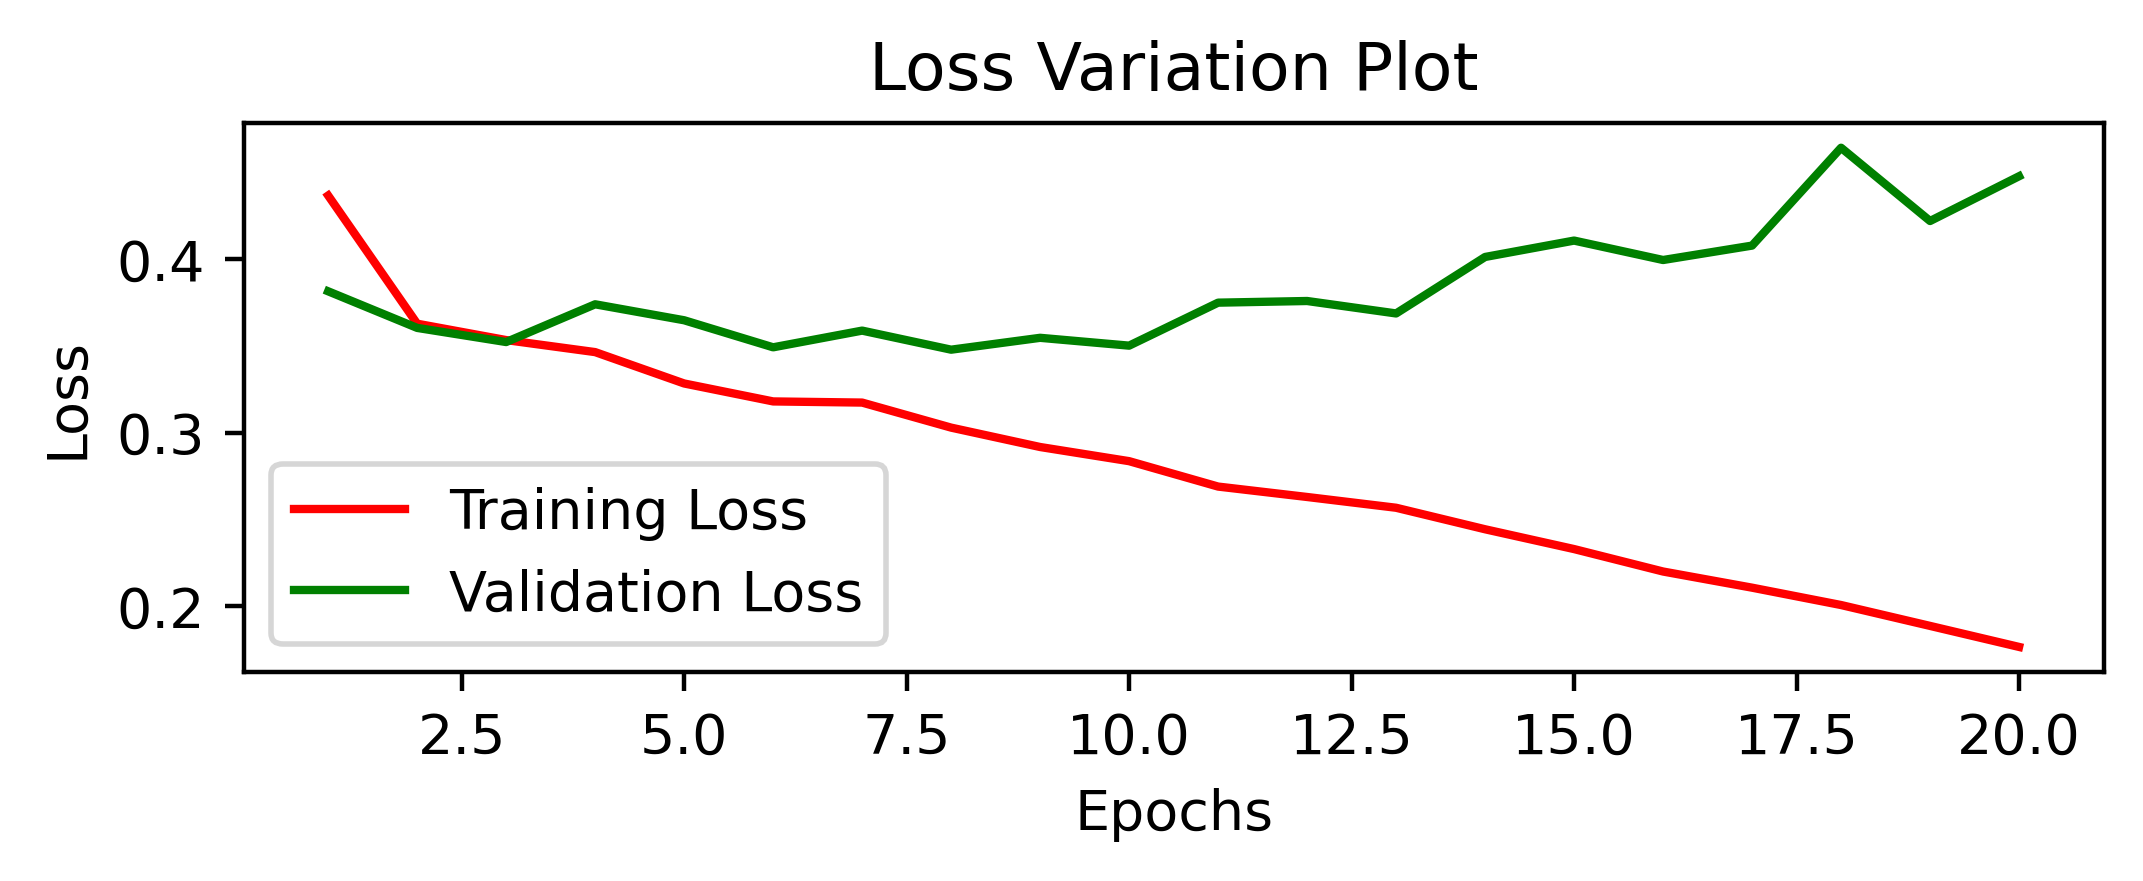

In [91]:
mpl.rcParams['figure.dpi'] = 400
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='red', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Accuracy variation plot

In [92]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

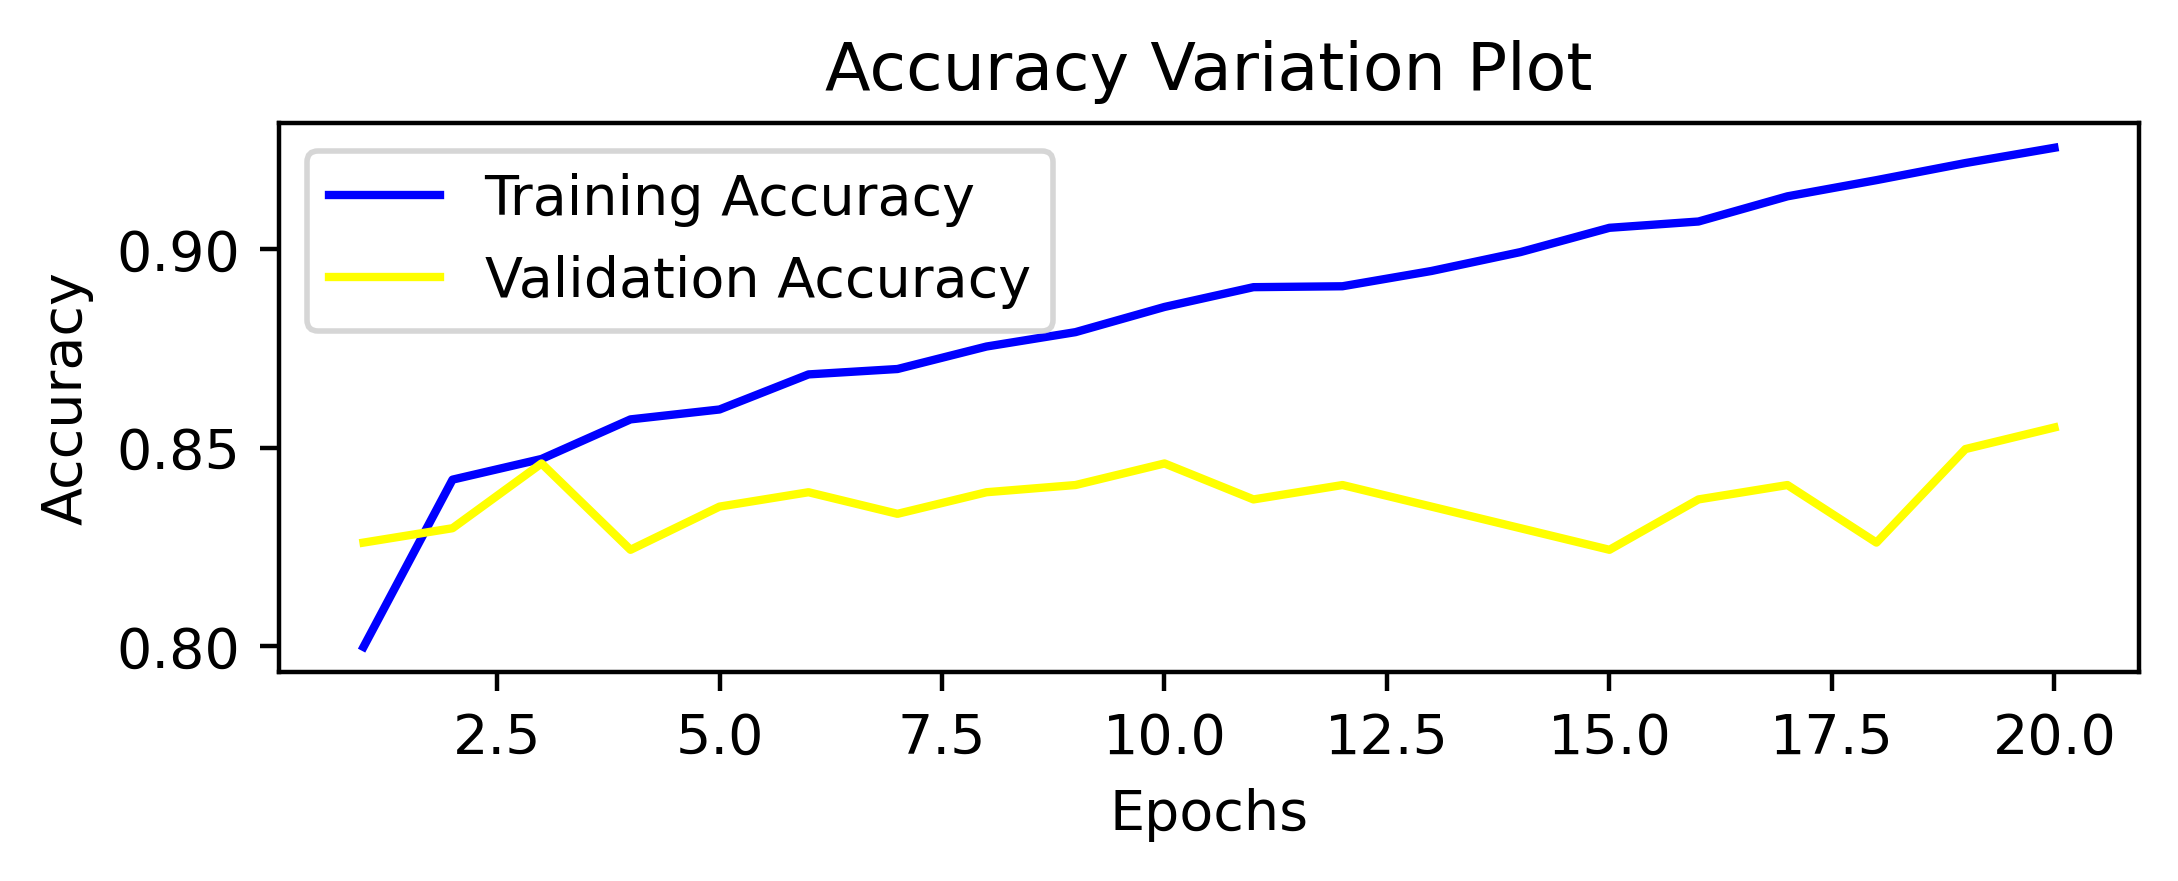

In [93]:
mpl.rcParams['figure.dpi'] = 400
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='blue', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='yellow', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Test the model

In [94]:
# Case 1
print(predictions[100])
print('Predicted:', np.argmax(predictions[100]))
print('Original:', y_test[100])

[9.9965084e-01 3.4911343e-04]
Predicted: 0
Original: 0


In [95]:
# case 2
print(predictions[8])
print('Predicted:', np.argmax(predictions[8]))
print('Original:', y_test[8])

[0.08402345 0.9159765 ]
Predicted: 1
Original: 1


## Save and verify model

In [96]:
model_90.save('Trained_model_90')

INFO:tensorflow:Assets written to: Trained_model_90\assets


In [97]:
model = tf.keras.models.load_model('Trained_model_90')
print(x_test[1])

[ 0.36653427 -0.72272281 -0.35973274 -0.30271342  0.70250017 -0.47328991
  1.37331758 -0.52528535 -0.71324521 -0.21611594  0.63935626 -0.19398549
  0.21981357  0.97365113 -0.47456891]


In [98]:
print(x_test[1].reshape( 1,-1))

[[ 0.36653427 -0.72272281 -0.35973274 -0.30271342  0.70250017 -0.47328991
   1.37331758 -0.52528535 -0.71324521 -0.21611594  0.63935626 -0.19398549
   0.21981357  0.97365113 -0.47456891]]


In [99]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.2265306 0.7734694]]


In [100]:
print(x_test[4])

[ 0.78792128 -0.32615924 -0.07491852  0.17005386 -1.42348719 -0.53550685
 -0.68705771 -0.52528535 -0.76938734 -0.32866523  0.51998084  1.1894861
  0.21981357 -0.67243567  0.64035294]


In [101]:
print(x_test[4].reshape( 1,-1))

[[ 0.78792128 -0.32615924 -0.07491852  0.17005386 -1.42348719 -0.53550685
  -0.68705771 -0.52528535 -0.76938734 -0.32866523  0.51998084  1.1894861
   0.21981357 -0.67243567  0.64035294]]


In [102]:
v = model.predict(x_test[4].reshape( 1,-1))
print(v)

[[0.05799805 0.9420019 ]]


## Evaluating the accuracy of the model

In [103]:
_, training_accuracy = model_90.evaluate(x_train , y_train , verbose = 0)
_ , testing_accuracy = model_90.evaluate(x_test,y_test , verbose = 0)
print(training_accuracy)
print(testing_accuracy)

0.9404438138008118
0.7989130616188049
